In [18]:
import tensorflow as tf
from tensorflow import keras 
from keras.datasets import mnist 
from keras import layers
from keras import models
from keras import utils
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


In [15]:
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

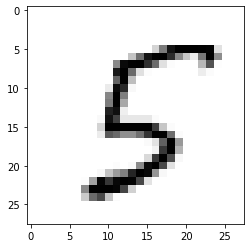

In [16]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
plt.imshow(test_images[23].reshape(28, 28),cmap='Greys')

shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255


train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [220]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

history_dict = history.history
print(history_dict.keys())


Epoch 1/10
750/750 [==============================] - 33s 43ms/step - loss: 0.2384 - accuracy: 0.9236 - val_loss: 0.0594 - val_accuracy: 0.9817
Epoch 2/10
750/750 [==============================] - 33s 44ms/step - loss: 0.0718 - accuracy: 0.9779 - val_loss: 0.0423 - val_accuracy: 0.9867
Epoch 3/10
750/750 [==============================] - 38s 51ms/step - loss: 0.0535 - accuracy: 0.9840 - val_loss: 0.0348 - val_accuracy: 0.9890
Epoch 4/10
750/750 [==============================] - 37s 49ms/step - loss: 0.0436 - accuracy: 0.9859 - val_loss: 0.0360 - val_accuracy: 0.9883
Epoch 5/10
750/750 [==============================] - 37s 49ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0331 - val_accuracy: 0.9905
Epoch 6/10
750/750 [==============================] - 37s 49ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0335 - val_accuracy: 0.9898
Epoch 7/10
750/750 [==============================] - 31s 42ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0320 - val_accuracy:

C:\Users\MEESAM~1\AppData\Local\Temp/ipykernel_4372/4283975413.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training acc', color= 'orange')
C:\Users\MEESAM~1\AppData\Local\Temp/ipykernel_4372/4283975413.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color= 'orange')


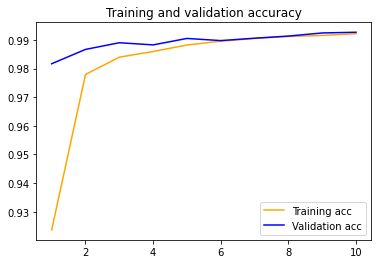

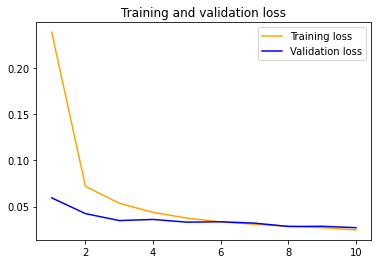

In [221]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc', color= 'orange')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss', color= 'orange')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
model.save("Model.h5")

In [ ]:
import tensorflowjs as tfjs
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

tfjs.converters.save_keras_model(
    Model, 'Handwritten_Digit_Recognition/static')


313/313 [==============================] - 2s 6ms/step - loss: 0.0241 - accuracy: 0.9931
Test Loss: 0.024114377796649933
Test Accuracy: 99.30999875068665
6
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        

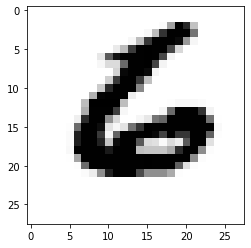

In [222]:
score = model.evaluate(test_images, test_labels)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1]*100)
image_index = 9999
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
print(model.summary())

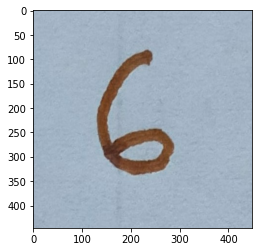

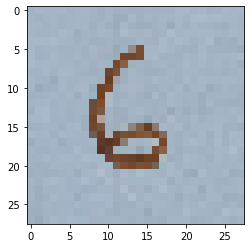

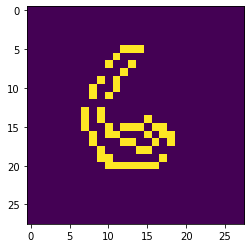

6


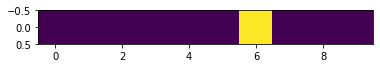

In [24]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import save_img
from keras.models import load_model
model = load_model('Model.h5')

filename = 'D:/BS practical/Python tutorial/FYP/Handwritten_Digit_Recognition/scan/6_1.jpg'
new = cv.imread(filename)
plt.imshow(new)
plt.show()
size = cv.resize(new, (28,28))
plt.imshow(size)
plt.show()
gray = cv.cvtColor(size, cv.COLOR_RGB2GRAY)
#blur = cv.GaussianBlur(size,(5,5),0)
edges = cv.Canny(gray,120,200)
plt.imshow(edges)
plt.show()

#thresh, bw_img = cv.threshold(gray, 120, 255, cv.THRESH_BINARY)
#bw_img1 = cv.bitwise_not(bw_img)
#plt.imshow(bw_img)
#plt.show()
new1 = img_to_array(edges)
# reshape into a single sample with 1 channel
new2 = new1.reshape(1, 28, 28, 1)
# prepare pixel data
new3 = new2.astype('float32')
new4 = new3 / 255.0
# predict the class
predict_value = model.predict(new4)
plt.imshow(predict_value)
print(predict_value.argmax())

